# Assignement E03 - DSIM

*Marco Donzella 829358*

Experiment with the compression of a color image by blurring the channels of the YCbCr representation, following the guidelines shown during the laboratory.

Rules:

1. Use a custom image (different from the ones provided).
2. Show the effect of blurring the luma channel, and the effect of blurring the chroma channels.
3. Experiment with, and show, the impact of blurring with visibly different intensities.

Submission:

1. Notebook with well-commented steps and observations on the results.
2. If you submit a .py script instead of a notebook, attach a short report for the observations on the results.
3. Name the submitted file as: E03_surname_name_studentID

## Image loading and visualization

Viene importata l'immagine *panda.jpg* e si osservano le principali caratteristiche.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

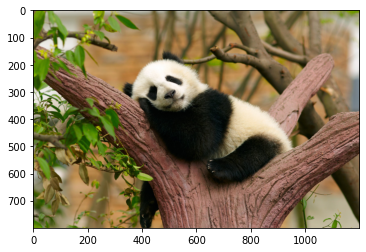

In [ ]:
im = io.imread('./panda.jpg') 
plt.imshow(im);

In [ ]:
im.shape # vediamo che la matrice è tridimensionale: 800 righe, 1200 colonne e 3 canali(RGB)

(800, 1200, 3)

L'immagine è una matrice tridimensionale costituita da 800 righe, 1200 colonne e 3 canali (RGB).

## From RGB to YCbCr

L'immagine viene convertita: dal formato RGB si passa al formato YCbCr utilizzando la funzione dipsonibile nel pacchetto color (https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2ycbcr):

In [ ]:
im_ycbcr = color.rgb2ycbcr(im) # immagine in YCbCr

In [ ]:
im_ycbcr.shape # l'immagine ha le stesse dimensioni di prima, ma i canali ora sono cambiati

(800, 1200, 3)

L'immagine ha le stesse dimensioni di prima, ma ora i canali sono cambiati:
- Y --> componente di luminanza
- Cb, Cr --> componeneti di crominanza

Viene di seguito visualizzata l'immagine nel nuovo formato:

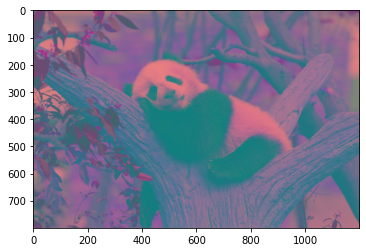

In [ ]:
plt.imshow(im_ycbcr.astype('uint8')) 

Vengono ora visualizzati i tre canali separatamente sia normalmente che in scala di grigio, così da avere una visualizzazione più interpretabile.

Text(0.5, 1.0, 'Cr')

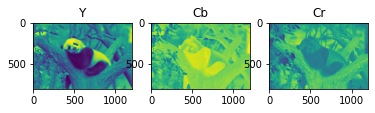

In [ ]:
plt.subplot(1,3,1); plt.imshow(im_ycbcr[:,:,0]); plt.title('Y') 
plt.subplot(1,3,2); plt.imshow(im_ycbcr[:,:,1]); plt.title('Cb') 
plt.subplot(1,3,3); plt.imshow(im_ycbcr[:,:,2]); plt.title('Cr')

Text(0.5, 1.0, 'Cr')

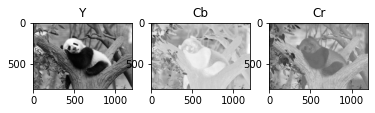

In [ ]:
plt.subplot(1,3,1); plt.imshow(im_ycbcr[:,:,0], cmap='gray'); plt.title('Y') 
plt.subplot(1,3,2); plt.imshow(im_ycbcr[:,:,1], cmap='gray'); plt.title('Cb') 
plt.subplot(1,3,3); plt.imshow(im_ycbcr[:,:,2], cmap='gray'); plt.title('Cr') 

## Gaussian Blur - Cb, Cr

Vengono sfocati i canali Cb e Cr utilizzando il filtro gaussiano. Successivamente verrà ricostruita l'immagine e riportata nel formato originale (RGB), così da vedere eventuali cambiamenti.

Come valori di sigma iniziali vengono utilizzate le deviazioni standard rispettivamente di ogni canale.

*N.B.: in base al valore assegnato al parametro sigma è possibile determinare il grado di sfocatura.*

In [ ]:
sigma_cb = np.std(im_ycbcr[:,:,1])
sigma_cr = np.std(im_ycbcr[:,:,2])
print(sigma_cb, sigma_cr) 

11.413158198734225 9.869302088605714


In [ ]:
im_cbcr = im_ycbcr
im_cbcr[:,:,1] = filters.gaussian(im_cbcr[:,:,1], sigma=(sigma_cb))
im_cbcr[:,:,2] = filters.gaussian(im_cbcr[:,:,2], sigma=(sigma_cr)) 

Ora si visualizzano i tre canali separatamente (in scala di grigio) per verificare che la sfocatura dei canali Cb e Cr sia avvenuta correttamente:

Text(0.5, 1.0, 'Cr')

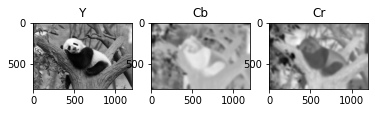

In [ ]:
plt.subplot(1,3,1); plt.imshow(im_cbcr[:,:,0], cmap='gray'); plt.title('Y') 
plt.subplot(1,3,2); plt.imshow(im_cbcr[:,:,1], cmap='gray'); plt.title('Cb') # sfocato
plt.subplot(1,3,3); plt.imshow(im_cbcr[:,:,2], cmap='gray'); plt.title('Cr') # sfocato

Si ricostruisce l'immagine nel formato iniziale RGB e visualizzata:

In [ ]:
new_rgb = color.ycbcr2rgb(im_cbcr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


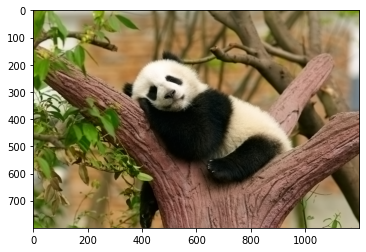

In [ ]:
plt.imshow(new_rgb) 

Nonostante la sfocatura dei canali Cb e Cr, l'immagine risulta comunque ben chiara e definita.

Si procede dunque provando a sfocare unicamente il canale Y relativo la luminanza. Verranno seguiti gli stessi passaggi visti precedentemente per i canali Cb e Cr.

## Gaussian Blur - Y

Come valore di sigma viene utilizzato il valore di deviazione standard del canale Y.

In [ ]:
im_ycbcr = color.rgb2ycbcr(im) # immagine in ycbcr
sigma_y = np.std(im_ycbcr[:,:,0])
print(sigma_y)

46.96564430318108


In [ ]:
im_y = im_ycbcr
im_y[:,:,0] = filters.gaussian(im_y[:,:,0], sigma=(sigma_y))

Text(0.5, 1.0, 'Cr')

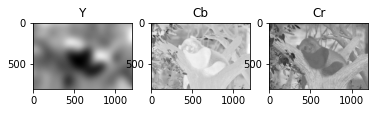

In [ ]:
plt.subplot(1,3,1); plt.imshow(im_y[:,:,0], cmap='gray'); plt.title('Y') # sfocato
plt.subplot(1,3,2); plt.imshow(im_y[:,:,1], cmap='gray'); plt.title('Cb') 
plt.subplot(1,3,3); plt.imshow(im_y[:,:,2], cmap='gray'); plt.title('Cr') 

Dalle immagini sopra riportate è possibile notare che il canale Y è stato sfumato correttamente, mentre i due canali restanti sono rimasti inalterati.

Viene riconvertita l'immagine nel formato RGB:

In [ ]:
new_rgb2 = color.ycbcr2rgb(im_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


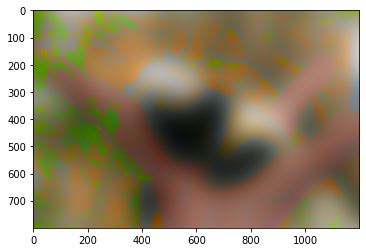

In [ ]:
plt.imshow(new_rgb2) # l'immagine stavolta risulta sfocata e incomprensibile

L'immagine risulta sfocata e poco comprnsibile. 

## Other examples

Vengono ora riportate alcune prove applicando diverse sfumature con il filtro gaussiano, cambiando il valore assegnato al parametro sigma.

Per effetuare queste prove verranno utilizzati sia i pacchetti presenti in *skimage* che quelli presenti in *OpenCV*.

In [ ]:
import cv2 

In [ ]:
im_ycbcr = color.rgb2ycbcr(im)

In [ ]:
img_ski = filters.gaussian(im_ycbcr, sigma=5, mode='constant', cval=0.0) # sigma=5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


In [ ]:
img_cv2 = cv2.GaussianBlur(im_ycbcr, (21,21), 0, borderType=cv2.BORDER_CONSTANT) # kernel size 21x21

In [ ]:
new_rgb_ski = color.ycbcr2rgb(img_ski) 
new_rgb_cv = color.ycbcr2rgb(img_cv2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


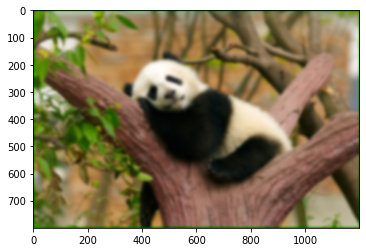

In [ ]:
plt.imshow(new_rgb_ski)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


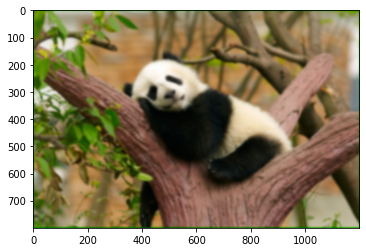

In [ ]:
plt.imshow(new_rgb_cv)

Entrambi i pacchetti offrono soluzioni interessanti per poter applicare il filtro gaussiano. 

Nella funzione filters.gaussian di *skimage* è possibile agire attivamente sulla sfocatura stabilendo il valore del parametro sigma.

Nella funzione cv2.GaussianBlur di *OpenCV* è possibile fare ciò decidendo la kernel size della finestra d'interesse, che si occuperà di trasformare i valori numerici dell'immagine, andando così a sfocarla. Inoltre è possibile intervenire su ulteriori parametri (come lo zero-padding ad esempio).